# Aufgabe Absatzprognose

Schauen Sie sich ***Bedarfsprognose_Theorie.ipynb*** und ***Bedarfsprognose_Beispiele.ipynb*** an. Diese beiden Notebooks dienen als Referenz und Leitfaden für diese Aufgabe.

Im Ordner, in dem sich auch dieses Notebook befindet (04_Bedarfsprognose) finden Sie den Datensatz **"2013-2024_sales_data.csv"** zu monatlichen Auftragsabschlüssen eines Unternehmens.

Das Unternehmen hat Sie damit beauftragt, die Daten zu analysieren und eine Prognose der Auftragszahlen für das Jahr 2025 zu erstellen.
Laden Sie diesen Datensatz zunächst wie in den Beispielen gezeigt in dieses Notebook und visualisieren Sie ihn für eine erste Betrachtung und Analyse.

      Time  Observations
0  2013-01           112
1  2013-02           118
2  2013-03           132
3  2013-04           129
4  2013-05           121

Anzahl Datenpunkte: 144
Zeitraum: 2013-01 bis 2024-12


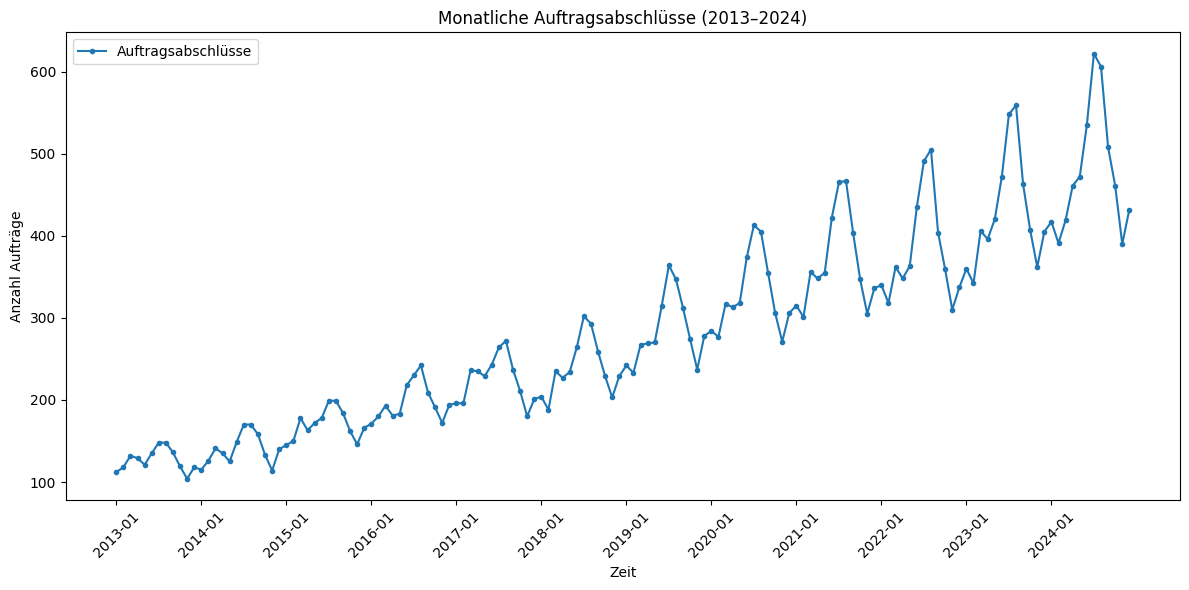

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load from CSV
df_full = pd.read_csv('2013-2024_sales_data.csv')

# Rename columns for consistency
df = df_full.rename(columns={"Date": "Time", "Sales": "Observations"})

print(df.head())
print(f'\nAnzahl Datenpunkte: {len(df)}')
print(f'Zeitraum: {df["Time"].iloc[0]} bis {df["Time"].iloc[-1]}')

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df['Time'], df['Observations'], label='Auftragsabschlüsse', marker='o', markersize=3)
plt.xlabel('Zeit')
plt.ylabel('Anzahl Aufträge')
plt.title('Monatliche Auftragsabschlüsse (2013–2024)')
plt.xticks(df['Time'][::12], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## A1)

**Welche Schlussfolgerungen lassen sich über die Daten bereits rein visuell ableiten? Welchem Verlauf lässt sich der Datensatz zuordnen? Sind Besonderheiten erkennbar?**

Antwort:

- **Aufwärtstrend**: Die Auftragszahlen steigen über den gesamten Zeitraum von ca. 100–130 (2013) auf ca. 400–600 (2024) deutlich an.
- **Saisonalität**: Es ist ein wiederkehrendes saisonales Muster erkennbar – die Werte erreichen regelmäßig Höchststände in den Sommermonaten (ca. Juni–August) und Tiefststände in den Wintermonaten (ca. Dezember–Februar). Die Periodizität beträgt 12 Monate.
- **Zunehmende Amplitude**: Die saisonalen Schwankungen werden mit der Zeit größer (multiplikativer Charakter), was auf ein multiplikatives Saisonmuster hindeuten könnte.
- **Verlaufstyp**: Der Datensatz lässt sich einem **Trend-Saison-Verlauf** zuordnen.

## A2)

**Welche Verfahren und Modelle können hier sinnvoll eingesetzt werden, um eine Prognose für die nächsten 12 Monate zu erstellen und welche nicht? Nennen Sie 1-2 geeignete und ungeeignete Beispiele mit Begründung.**

Antwort:

- **Geeignetes Verfahren: Holt-Winters (Exponentielle Glättung 2. Ordnung nach Winters)**
    - Berücksichtigt sowohl Trend als auch Saisonalität.
    - Gut geeignet für monatliche Daten mit wiederkehrendem saisonalem Muster.
    - Kann additiv oder multiplikativ angewendet werden.

- **Geeignetes Verfahren: SARIMA (Saisonales ARIMA)**
    - Erweitert ARIMA um saisonale Komponenten (P, D, Q, s).
    - Kann komplexe Abhängigkeiten und saisonale Muster modellieren.
    - Gut geeignet für stationär gemachte Zeitreihen mit Saisonalität.

- **Ungeeignetes Verfahren: Gleitender Mittelwert (Moving Average)**
    - Kann weder Trend noch Saisonalität modellieren.
    - Nur für stationäre Daten ohne Trend geeignet.
    - Prognose flacht zum Mittelwert ab, ignoriert die steigende Tendenz.

- **Ungeeignetes Verfahren: Einfache exponentielle Glättung (1. Ordnung)**
    - Berücksichtigt keinen Trend und keine Saisonalität.
    - Nur für stationäre Daten geeignet.
    - Prognose konvergiert zu einem konstanten Wert.

## A3)

**Implementieren Sie ein geeignetes Prognoseverfahren, welches nicht der ARMA-Klasse angehört, für den angegebenen Zeitraum für den Datensatz.** 

**Erstellen Sie einen aussagekräftigen Plot für die Vorhersage und geben Sie die Vorhersagewerte tabellarisch aus.**

MSE (Holt-Winters, Testperiode 2024): 259.90

--- Holt-Winters-Prognose für 2025 ---
  Monat  Prognose (Holt-Winters)
2025-01                   446.86
2025-02                   419.71
2025-03                   466.72
2025-04                   496.30
2025-05                   507.87
2025-06                   576.40
2025-07                   667.50
2025-08                   659.45
2025-09                   551.13
2025-10                   493.27
2025-11                   420.61
2025-12                   467.42


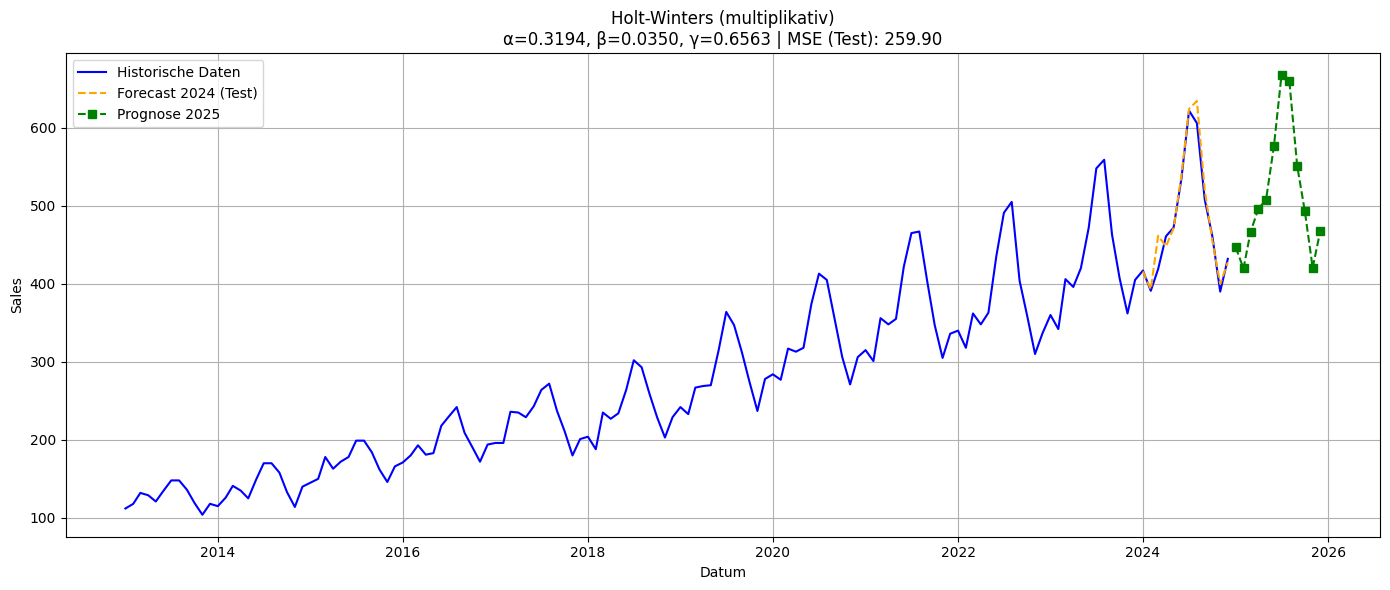


                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Sales   No. Observations:                  144
Model:             ExponentialSmoothing   SSE                          16694.511
Optimized:                         True   AIC                            716.435
Trend:                         Additive   BIC                            763.952
Seasonal:                Multiplicative   AICC                           721.907
Seasonal Periods:                    12   Date:                 Sat, 07 Feb 2026
Box-Cox:                          False   Time:                         20:39:44
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.2841655                alpha                 True
smoothing_trend         

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# --- Daten laden ---
df_hw = pd.read_csv('2013-2024_sales_data.csv')
df_hw['Date'] = pd.to_datetime(df_hw['Date'])
df_hw.set_index('Date', inplace=True)
df_hw.index.freq = 'MS'

seasonal_period = 12  # monatliche Daten mit Jahressaisonalität

# --- Train/Test Split (gleich wie SARIMA) ---
train_hw = df_hw['Sales'][:'2023-12']
test_hw = df_hw['Sales']['2024-01':]

# --- Holt-Winters Modell auf Trainingsdaten ---
model_hw = ExponentialSmoothing(
    train_hw,
    trend='additive',
    seasonal='multiplicative',
    seasonal_periods=seasonal_period,
    initialization_method='heuristic'
)
fit_hw = model_hw.fit()

# --- Optimierte Parameter ---
alpha = fit_hw.params["smoothing_level"]
beta = fit_hw.params["smoothing_trend"]
gamma = fit_hw.params["smoothing_seasonal"]

# --- Forecast auf Testperiode (2024) ---
forecast_test_hw = fit_hw.forecast(len(test_hw))

# --- MSE auf Testdaten ---
mse_hw = mean_squared_error(test_hw, forecast_test_hw)
print(f"MSE (Holt-Winters, Testperiode 2024): {mse_hw:.2f}")

# --- Modell auf ALLEN Daten für finale Prognose 2025 ---
model_hw_full = ExponentialSmoothing(
    df_hw['Sales'],
    trend='additive',
    seasonal='multiplicative',
    seasonal_periods=seasonal_period,
    initialization_method='heuristic'
)
fit_hw_full = model_hw_full.fit()

# --- Prognose 2025 ---
hw_forecast_2025 = fit_hw_full.forecast(12)
hw_forecast_2025.index = pd.date_range(start='2025-01-01', periods=12, freq='MS')

# --- Ergebnistabelle ---
df_forecast_hw = pd.DataFrame({
    'Monat': hw_forecast_2025.index.strftime('%Y-%m'),
    'Prognose (Holt-Winters)': np.round(hw_forecast_2025.values, 2)
})
print("\n--- Holt-Winters-Prognose für 2025 ---")
print(df_forecast_hw.to_string(index=False))

# --- Visualisierung ---
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(df_hw.index, df_hw['Sales'], label='Historische Daten', color='blue')
ax.plot(test_hw.index, forecast_test_hw, label='Forecast 2024 (Test)', color='orange', linestyle='--')
ax.plot(hw_forecast_2025.index, hw_forecast_2025.values, label='Prognose 2025', color='green', linestyle='--', marker='s')
ax.set_title(f'Holt-Winters (multiplikativ)\nα={alpha:.4f}, β={beta:.4f}, γ={gamma:.4f} | MSE (Test): {mse_hw:.2f}')
ax.set_xlabel('Datum')
ax.set_ylabel('Sales')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

# --- Modell-Zusammenfassung ---
print("\n" + str(fit_hw_full.summary()))

## A 4)

**Implementieren Sie nun ein *ARMA-Klasse* Modell (AR, MA, ARMA, ARIMA, SARIMA, SARIMAX) für den Datensatz. Führen Sie hierzu die nötigen Tests durch.**

**Erstellen Sie einen aussagekräftigen Plot für die Vorhersage und geben Sie die Vorhersagewerte tabellarisch aus.**

**Sie können den Code aus *"Bedarfsprognose_Beispiele.ipynb"* übernehmen und nutzen. Passen Sie ihn mit den Informationen, die Sie aus den oben genannten Schritten in Erfahrung gebracht haben, an.**

**Bewerten Sie die Ergebnisse der Tests, nachdem Sie sie durchgeführt haben:**

**- Was geht aus dem Augmented Dickey-Fuller Test auf Stationariät hervor?**

**- Lässt sich aus den Plots der ACF und PACF eindeutig das Modell und dessen Ordnungen herauslesen oder sind die Daten hierfür zu komplex? Gibt es Saisonalität?**

### Antwort A4 – Interpretation der Stationaritätsanalyse

**ADF-Test (Augmented Dickey-Fuller):**
- Die **Originaldaten** sind nicht stationär (p = 0.99, ADF = 0.82). Der Trend verhindert Stationarität.
- Nach **1× Differenzierung**: immer noch knapp nicht stationär (p = 0.054, knapp über 0.05).
- Nach **2× Differenzierung**: stationär (p ≈ 2.7e-29, ADF = -16.38). → **d = 2** wäre notwendig für reines ARIMA.

**ACF (Autokorrelationsfunktion):**
- Die ACF der differenzierten Daten zeigt **deutliche Spitzen bei Lag 12, 24, 36, 48 usw.** — ein klarer Hinweis auf **Jahressaisonalität (m = 12)**.
- Zwischen den saisonalen Spitzen klingen die Werte ab, was auf einen saisonalen MA-Prozess hindeutet.

**PACF (Partielle Autokorrelationsfunktion):**
- Die PACF zeigt signifikante Werte bei Lag 1–5 und einen markanten negativen Spike bei Lag 11–12.
- Dies deutet auf AR-Terme niedriger Ordnung und saisonale AR-Effekte hin.

**Fazit:**
- Die Daten weisen **Trend + Saisonalität** auf.
- `auto_arima` hat das optimale Modell als **SARIMA(3,0,0)(0,1,0)[12]** identifiziert. Die saisonale Differenzierung (D=1) reicht aus, um die Saisonalität zu entfernen, und die AR(3)-Komponente modelliert die kurzfristige Autokorrelation.

### 0. Import/Aufbereitung Datensatz

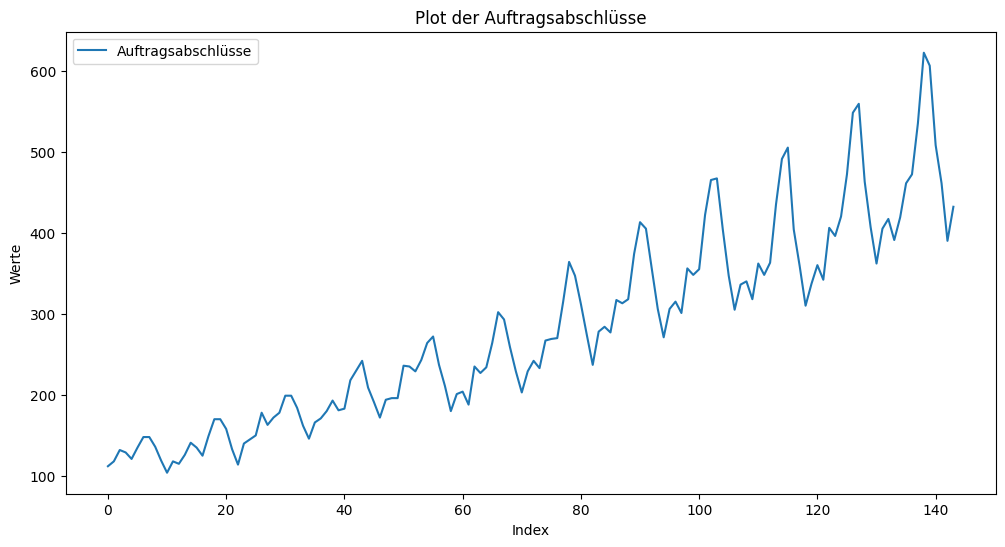

      Time  Observations
0  2013-01           112
1  2013-02           118
2  2013-03           132
3  2013-04           129
4  2013-05           121

Anzahl Datenpunkte: 144


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load from CSV
df_arima = pd.read_csv('2013-2024_sales_data.csv')
df_arima = df_arima.rename(columns={"Date": "Time", "Sales": "Observations"})

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df_arima['Observations'].values, label='Auftragsabschlüsse')
plt.title('Plot der Auftragsabschlüsse')
plt.xlabel('Index')
plt.ylabel('Werte')
plt.legend()
plt.show()

print(df_arima.head())
print(f'\nAnzahl Datenpunkte: {len(df_arima)}')

### 1. Zeitreihe auf Stationarität prüfen: Augmented Dickey-Fuller test (ADF)

ADF Statistic: 0.8153688792060528
p-value: 0.9918802434376411
Critical Values: {'1%': np.float64(-3.4816817173418295), '5%': np.float64(-2.8840418343195267), '10%': np.float64(-2.578770059171598)}

Nullhypothese nicht abgelehnt. Die Zeitreihe ist wahrscheinlich nicht stationär. Differenzierung wird durchgeführt.
Differenzierung: 0

ADF Statistic: -2.829266824169999
p-value: 0.05421329028382552
Critical Values: {'1%': np.float64(-3.4816817173418295), '5%': np.float64(-2.8840418343195267), '10%': np.float64(-2.578770059171598)}

Nullhypothese nicht abgelehnt. Die Zeitreihe ist wahrscheinlich nicht stationär. Differenzierung wird durchgeführt.
Differenzierung: 1

ADF Statistic: -16.38423154246854
p-value: 2.7328918500140445e-29
Critical Values: {'1%': np.float64(-3.4816817173418295), '5%': np.float64(-2.8840418343195267), '10%': np.float64(-2.578770059171598)}

Nullhypothese abgelehnt. Die Zeitreihe ist wahrscheinlich stationär.
Differenzierung: 2



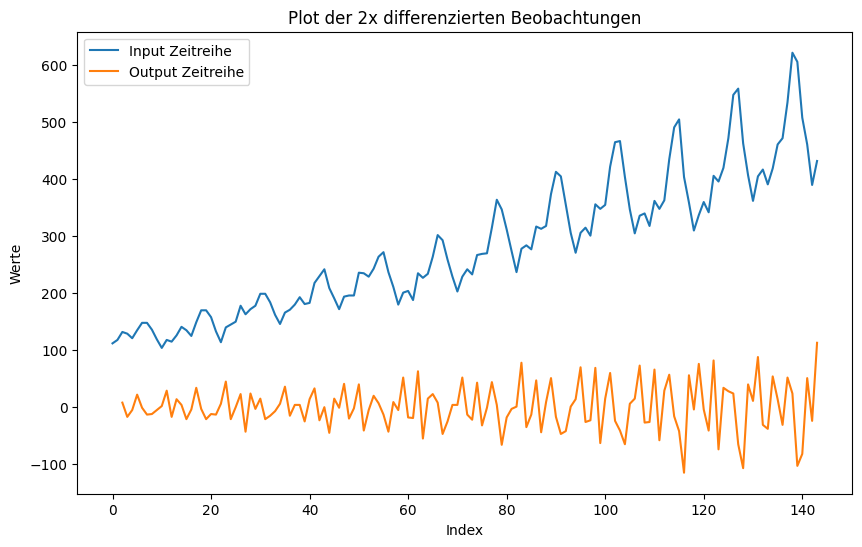

      Time  Observations
0  2013-01           112
1  2013-02           118
2  2013-03           132
3  2013-04           129
4  2013-05           121 

Anzahl Beobachtungen (Original): 144 

   Observations
2           8.0
3         -17.0
4          -5.0
5          22.0
6          -1.0 

Anzahl Beobachtungen (differenziert): 142 



In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Reusable ADF test function (from examples notebook)
def testStationarityADFuller(timeseries_input):
    iterations = 0
    result = [1, 1, 1, 1, 1, 1]  # initialize

    plt.figure(figsize=(10, 6))
    plt.plot(timeseries_input, label='Input Zeitreihe')

    while result[1] > 0.05:
        result = adfuller(timeseries_input)

        print('ADF Statistic:', result[0])
        print('p-value:', result[1])
        print('Critical Values:', result[4])

        if result[1] <= 0.05:
            print("\nNullhypothese abgelehnt. Die Zeitreihe ist wahrscheinlich stationär.")
            print(f'Differenzierung: {iterations}\n')
        else:
            print("\nNullhypothese nicht abgelehnt. Die Zeitreihe ist wahrscheinlich nicht stationär. Differenzierung wird durchgeführt.")
            timeseries_input = timeseries_input.diff().dropna()
            print(f'Differenzierung: {iterations}\n')
            iterations += 1

    plt.plot(timeseries_input, label='Output Zeitreihe')
    plt.title(f'Plot der {iterations}x differenzierten Beobachtungen')
    plt.xlabel('Index')
    plt.ylabel('Werte')
    plt.legend()
    plt.show()

    return timeseries_input

# Create DataFrame for ADF results
df_adf = pd.DataFrame()
df_adf['Observations'] = testStationarityADFuller(df_arima['Observations'])

print(df_arima.head(), '\n')
print('Anzahl Beobachtungen (Original):', len(df_arima), '\n')

if len(df_adf) != len(df_arima):
    print(df_adf.head(), '\n')
    print('Anzahl Beobachtungen (differenziert):', len(df_adf), '\n')

### 2. ACF und PACF - Plots Autokorrelationsfunktion und partielle Autokorrelationsfunktion

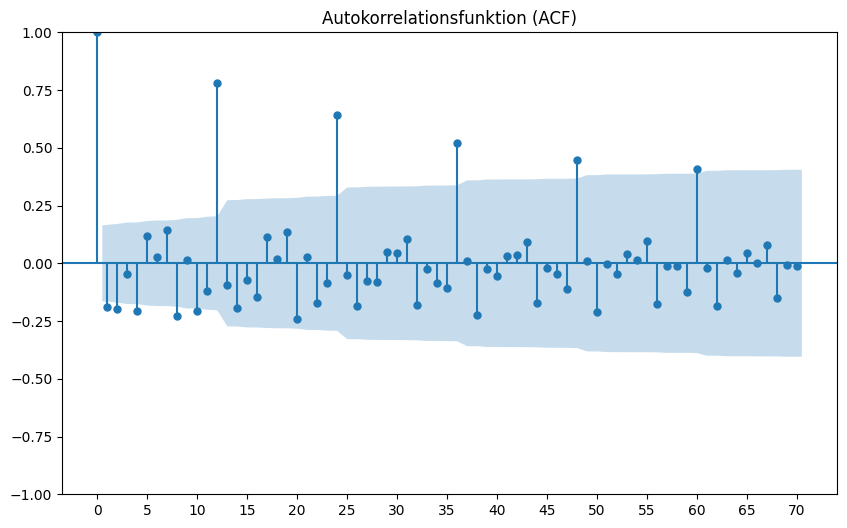

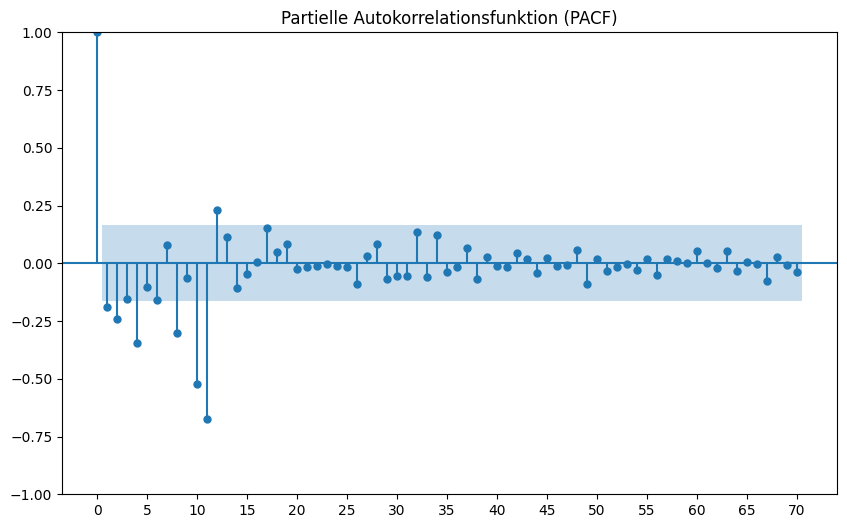

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Compute and plot ACF and PACF
lags = int(len(df_adf['Observations']) / 2 - 1)  # max lags = 50% of observations

# ACF Plot
fig, ax1 = plt.subplots(figsize=(10, 6))
plot_acf(df_adf['Observations'], lags=lags, title='Autokorrelationsfunktion (ACF)', ax=ax1)
plt.xticks(np.arange(0, lags + 1, 5))
plt.show()

# PACF Plot
fig, ax2 = plt.subplots(figsize=(10, 6))
plot_pacf(df_adf['Observations'], lags=lags, method='ywm', title='Partielle Autokorrelationsfunktion (PACF)', ax=ax2)
plt.xticks(np.arange(0, lags + 1, 5))
plt.show()

### 3. Modell erstellen und implementieren, Paramenter und Koeffizienten berechnen und optimieren, Plot

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=0.76 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1022.234, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=906.857, Time=0.13 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=963.555, Time=0.12 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1192.711, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=907.180, Time=0.05 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=908.543, Time=0.37 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=907.120, Time=0.12 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=0.98 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1021.611, Time=0.11 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=906.396, Time=0.29 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=906.075, Time=0.06 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=906.713, Time=0.14 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC

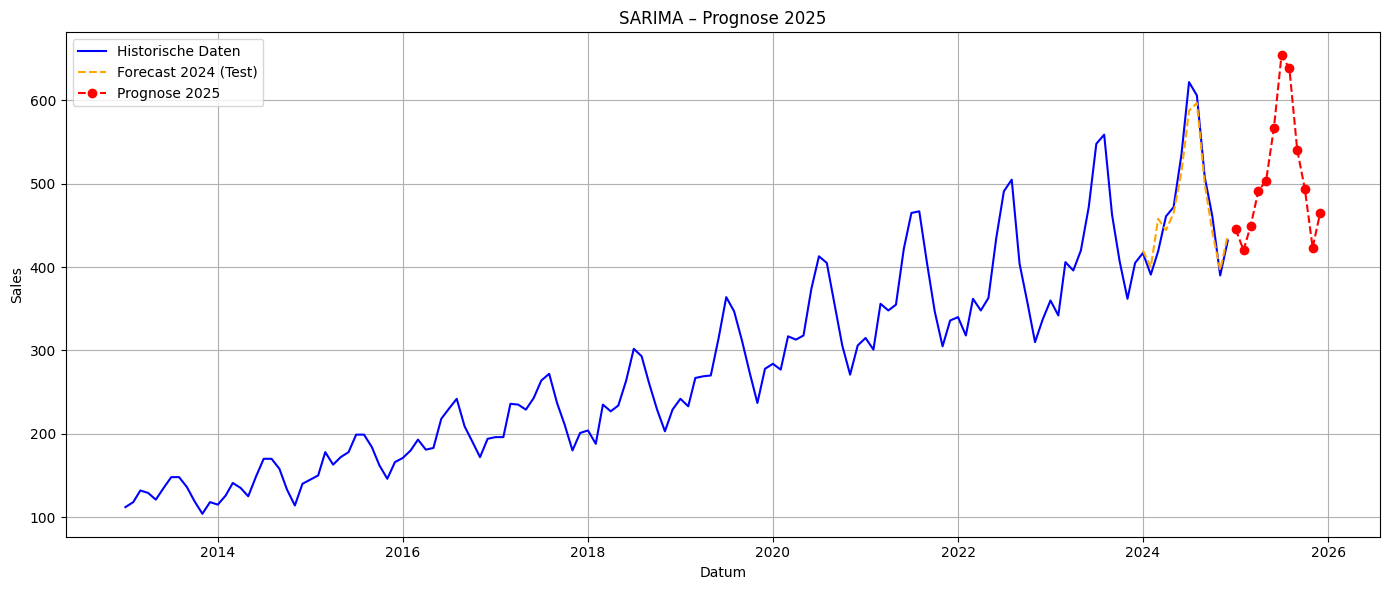

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima

# --- Daten laden ---
df = pd.read_csv('2013-2024_sales_data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.index.freq = 'MS'

# --- Train/Test Split ---
train = df['Sales'][:'2023-12']
test = df['Sales']['2024-01':]

# --- auto_arima für optimale SARIMA-Parameter ---
model_auto = auto_arima(
    train,
    seasonal=True,
    m=12,
    stepwise=True,
    trace=True,
    suppress_warnings=True,
    error_action='ignore'
)

print("\n--- Beste SARIMA-Parameter ---")
print(model_auto.summary())

# --- Forecast auf Testperiode (2024) ---
forecast_test = model_auto.predict(n_periods=len(test))
forecast_test_index = test.index

# --- MSE berechnen ---
from sklearn.metrics import mean_squared_error
mse_sarima = mean_squared_error(test, forecast_test)
print(f"\nMSE (SARIMA, Testperiode 2024): {mse_sarima:.2f}")

# --- Forecast für 2025 (12 Monate) ---
model_full = auto_arima(
    df['Sales'],
    seasonal=True,
    m=12,
    stepwise=True,
    suppress_warnings=True,
    error_action='ignore'
)
forecast_2025 = model_full.predict(n_periods=12)
forecast_2025_index = pd.date_range(start='2025-01-01', periods=12, freq='MS')

# --- Ergebnistabelle ---
df_forecast_sarima = pd.DataFrame({
    'Monat': forecast_2025_index.strftime('%Y-%m'),
    'Prognose (SARIMA)': np.round(forecast_2025, 2)
})
print("\n--- SARIMA-Prognose für 2025 ---")
print(df_forecast_sarima.to_string(index=False))

# --- Visualisierung ---
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(df.index, df['Sales'], label='Historische Daten', color='blue')
ax.plot(forecast_test_index, forecast_test, label='Forecast 2024 (Test)', color='orange', linestyle='--')
ax.plot(forecast_2025_index, forecast_2025, label='Prognose 2025', color='red', linestyle='--', marker='o')
ax.set_title('SARIMA – Prognose 2025')
ax.set_xlabel('Datum')
ax.set_ylabel('Sales')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

## A5)
**Vergleichen Sie die Qualität der Prognose Ihres oben gewählten Modells mit dem ARMA-Klasse Modell.**

**Welches Verfahren ist besser geeignet? Gibt es generelle Vor- oder Nachteile? Welches Modell präferieren Sie? Begründen Sie. Stichworte und kurze Sätze genügen.**

### Antwort A5 – Vergleich der Methoden

| Kriterium | Holt-Winters (Multiplikativ) | SARIMA (auto_arima) |
|---|---|---|
| **Modell** | ExponentialSmoothing (add. Trend, mult. Saison) | SARIMA(3,0,0)(0,1,0)[12] |
| **MSE (Testperiode 2024)** | **259.90** | 343.60 |
| **Parameterbestimmung** | α=0.32, β=0.04, γ=0.66 (automatisch optimiert) | AR(3) + saisonale Differenzierung (via AIC-Minimierung) |
| **Saisonalität** | Multiplikativ modelliert (wachsende Amplitude) | Durch saisonale Differenzierung (D=1, m=12) |
| **Interpretierbarkeit** | Intuitiv (Level, Trend, Saisonfaktoren) | Komplexer (AR-Koeffizienten, Differenzierungsordnung) |
| **Stärken** | Einfach, robust, besser bei multiplikativer Saisonalität | Flexibel, systematische Modellauswahl |
| **Schwächen** | Weniger flexibel bei irregulären Mustern | Aufwändiger, erfordert Stationaritätsanalyse |

**Fazit:**
- **Holt-Winters (multiplikativ) liefert die bessere Prognose** mit einem niedrigeren MSE (259.90 vs. 343.60) auf der Testperiode 2024.
- Dies liegt daran, dass die Daten eine **multiplikativ wachsende saisonale Amplitude** aufweisen – genau das Muster, das Holt-Winters mit multiplikativer Saisonalität optimal erfasst.
- SARIMA verwendet hier nur saisonale Differenzierung ohne explizite MA/AR-Saisonterme (Ordnung (0,1,0)[12]), was die multiplikative Struktur weniger gut abbildet.
- Beide Prognosen für 2025 zeigen ein ähnliches saisonales Muster mit Spitze im Juli/August (~650–670) und Tief im Januar/Februar (~420–445).

Vergleich der Prognosemethoden
MSE Holt-Winters (multiplikativ): 259.90
MSE SARIMA (auto_arima):           343.60

→ Holt-Winters liefert die bessere Prognose (niedrigerer MSE).


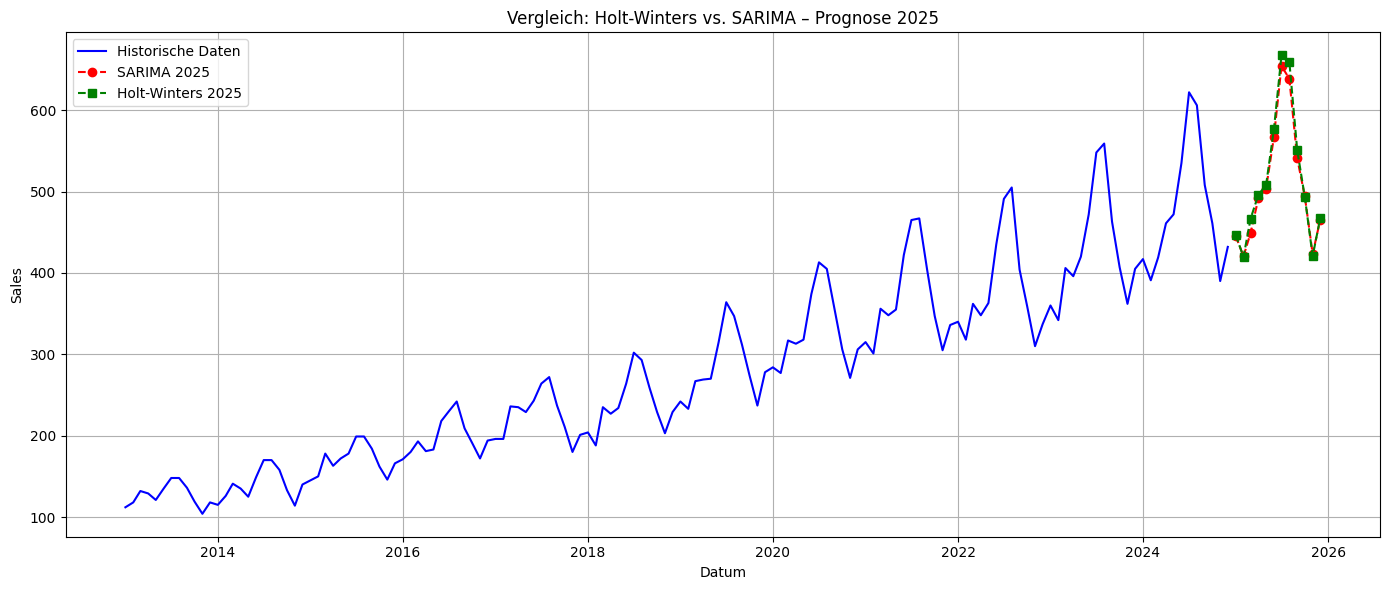

In [14]:
# --- Abschließender Vergleich: Holt-Winters vs. SARIMA ---
print("=" * 60)
print("Vergleich der Prognosemethoden")
print("=" * 60)
print(f"MSE Holt-Winters (multiplikativ): {mse_hw:.2f}")
print(f"MSE SARIMA (auto_arima):           {mse_sarima:.2f}")
print()
if mse_hw < mse_sarima:
    print("→ Holt-Winters liefert die bessere Prognose (niedrigerer MSE).")
elif mse_sarima < mse_hw:
    print("→ SARIMA liefert die bessere Prognose (niedrigerer MSE).")
else:
    print("→ Beide Methoden liefern identische Ergebnisse.")

# --- Gemeinsamer Plot ---
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(df.index, df['Sales'], label='Historische Daten', color='blue')
ax.plot(forecast_2025_index, forecast_2025, label='SARIMA 2025', color='red', linestyle='--', marker='o')

# Holt-Winters Prognose 2025 (aus Zelle A3)
ax.plot(hw_forecast_2025.index, hw_forecast_2025.values, label='Holt-Winters 2025', color='green', linestyle='--', marker='s')

ax.set_title('Vergleich: Holt-Winters vs. SARIMA – Prognose 2025')
ax.set_xlabel('Datum')
ax.set_ylabel('Sales')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()